In [1]:
#Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import yfinance as yf

**Project 1: Stock Market Trend Analysis Using Yahoo Finance**

**Introduction:**

Stock analysis refers to the method that an investor or trader uses to evaluate and investigate a particular trading instrument, investment sector, or the stock market as a whole. Stock analysis is also called equity analysis or market analysis. Investors or traders make buying or selling decisions based on stock analysis information.
Stock market analysis is crucial for investors to make informed decisions. This project involves analyzing historical stock prices of Apple(AAPL), Bitcoin(BTC-USD), Google(GOOGL), Facebook(META) and Tesla(TSLA),  identifying their trends and evaluating risk through statistical and visual methods. Python programming language was used to fetch, clean, and analyze stock data using the moving average indicator.


In [2]:
# Dataset: Downloading AAPL, TSLA GOOGL, META and BTC-USD from yahoo finance

# set time range
start_date = "2019-04-01"
end_date = "2025-02-28"


#Define
tickers = ['AAPL', 'TSLA', 'GOOGL', 'META', 'BTC-USD']


# Download the data
data = yf.download(tickers, start=start_date, end = end_date)["Close"]

# Reset your index so your date become your column
data = data.reset_index()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


In [3]:
data.head()

Ticker,Date,AAPL,BTC-USD,GOOGL,META,TSLA
0,2019-04-01,45.810329,4158.183105,59.663750,167.908646,19.278667
1,2019-04-02,46.476257,4879.877930,59.990189,173.382843,19.058666
2,2019-04-03,46.794853,4973.021973,60.252438,172.725937,19.454000
3,2019-04-04,46.876293,4922.798828,60.682384,175.194305,17.851999
4,2019-04-05,47.190094,5036.681152,60.284279,174.895721,18.330667


DATA CLEANING

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2160 non-null   datetime64[ns]
 1   AAPL     1487 non-null   float64       
 2   BTC-USD  2160 non-null   float64       
 3   GOOGL    1487 non-null   float64       
 4   META     1487 non-null   float64       
 5   TSLA     1487 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 101.4 KB


In [5]:
# Check for missing value
data[data.isnull().any(axis = 1)]

Ticker,Date,AAPL,BTC-USD,GOOGL,META,TSLA
5,2019-04-06,NaN,5059.817383,NaN,NaN,NaN
6,2019-04-07,NaN,5198.896973,NaN,NaN,NaN
12,2019-04-13,NaN,5096.586426,NaN,NaN,NaN
13,2019-04-14,NaN,5167.722168,NaN,NaN,NaN
18,2019-04-19,NaN,5303.812500,NaN,NaN,NaN
...,...,...,...,...,...,...
2147,2025-02-15,NaN,97580.351562,NaN,NaN,NaN
2148,2025-02-16,NaN,96175.031250,NaN,NaN,NaN
2149,2025-02-17,NaN,95773.382812,NaN,NaN,NaN
2154,2025-02-22,NaN,96577.757812,NaN,NaN,NaN


***Analysis***

The technical analysis method involves examining data generated through market activities, such as volume and prices. Analysts
following such a type of stock analysis use technical indicators and tools like charts and oscillators to identify patterns that can indicate future price trends or direction.


In [6]:
# Drop the NAN values
data = data.dropna()

In [7]:
# Melting the dataset into a single column
data_melt = pd.melt(data, id_vars ="Date", value_vars = tickers, var_name = "Company", value_name = "Close")

In [8]:
data_melt.head()

,Date,Company,Close
0,2019-04-01,AAPL,45.810329
1,2019-04-02,AAPL,46.476257
2,2019-04-03,AAPL,46.794853
3,2019-04-04,AAPL,46.876293
4,2019-04-05,AAPL,47.190094


**Diagrams: **

The following charts were generated to visualize trends and correlation of the selected stock:

1. Figure 1: Stock Price Over the past 5 years
2. Figure 2: Stock Price of APPL Over the last 5 years.
3. Figure 3: Stock Price of TSLA Over the last 5 years.
4. Figure 4: Stock Price of GOOGL Over the last 5 years.
5. Figure 5: Price trend of Facebook Over the last 5 years
6. First difference of the stock price.
7. Figure 6: Correlation Heatmap of Daily Prices

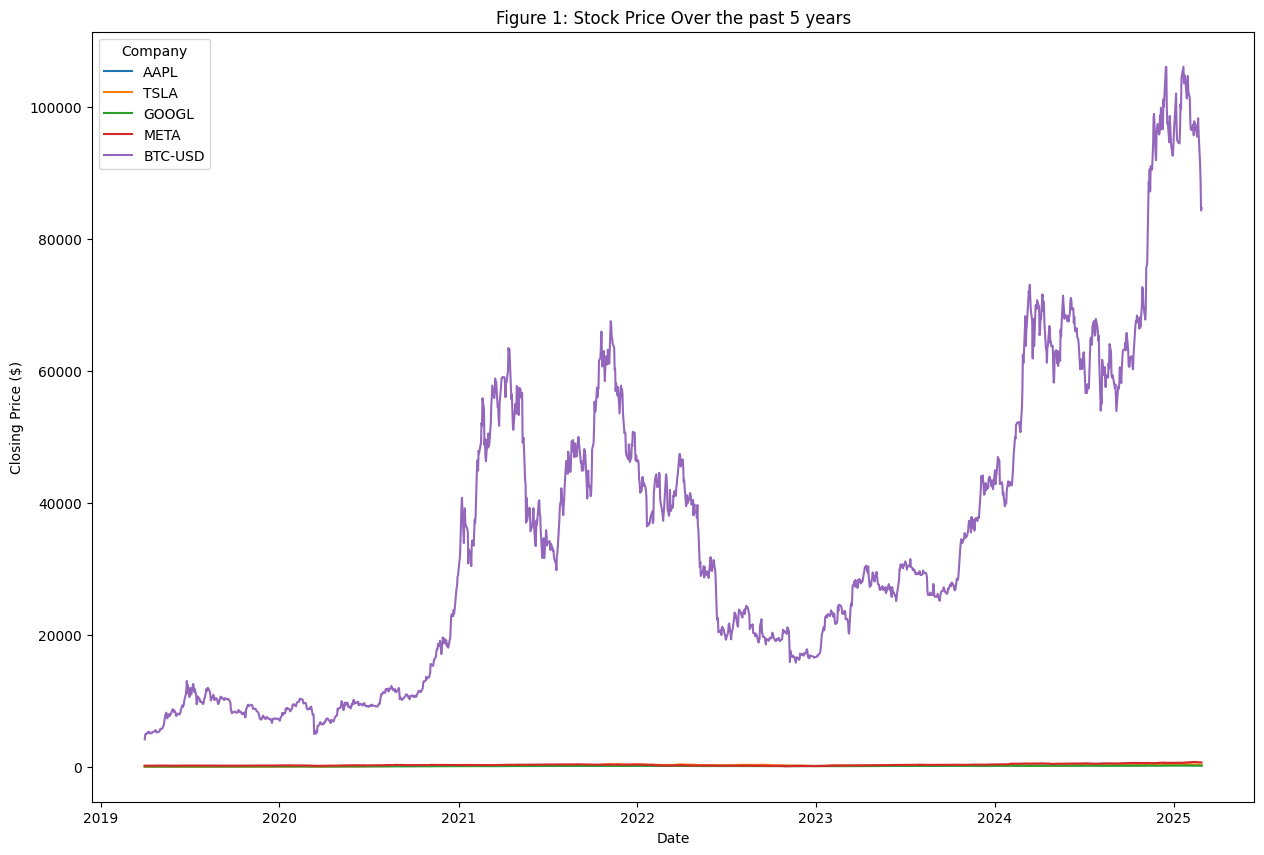

In [9]:
# overall price trend of the selected stock over the past 5 years
plt.figure(figsize = (15, 10))
sns.lineplot(data = data_melt, x = "Date", y = "Close", hue = "Company")
plt.title("Figure 1: Stock Price Over the past 5 years")
plt.xlabel("Date")
plt.ylabel("Closing Price ($)")
plt.legend(title = "Company")
plt.show()

Observe that BTC-USD is more volatile than the rest of the stock. That is why the trend of the rest of the stock is not visible

<ipython-input-10-dc7778ce65ba>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = "Apple")


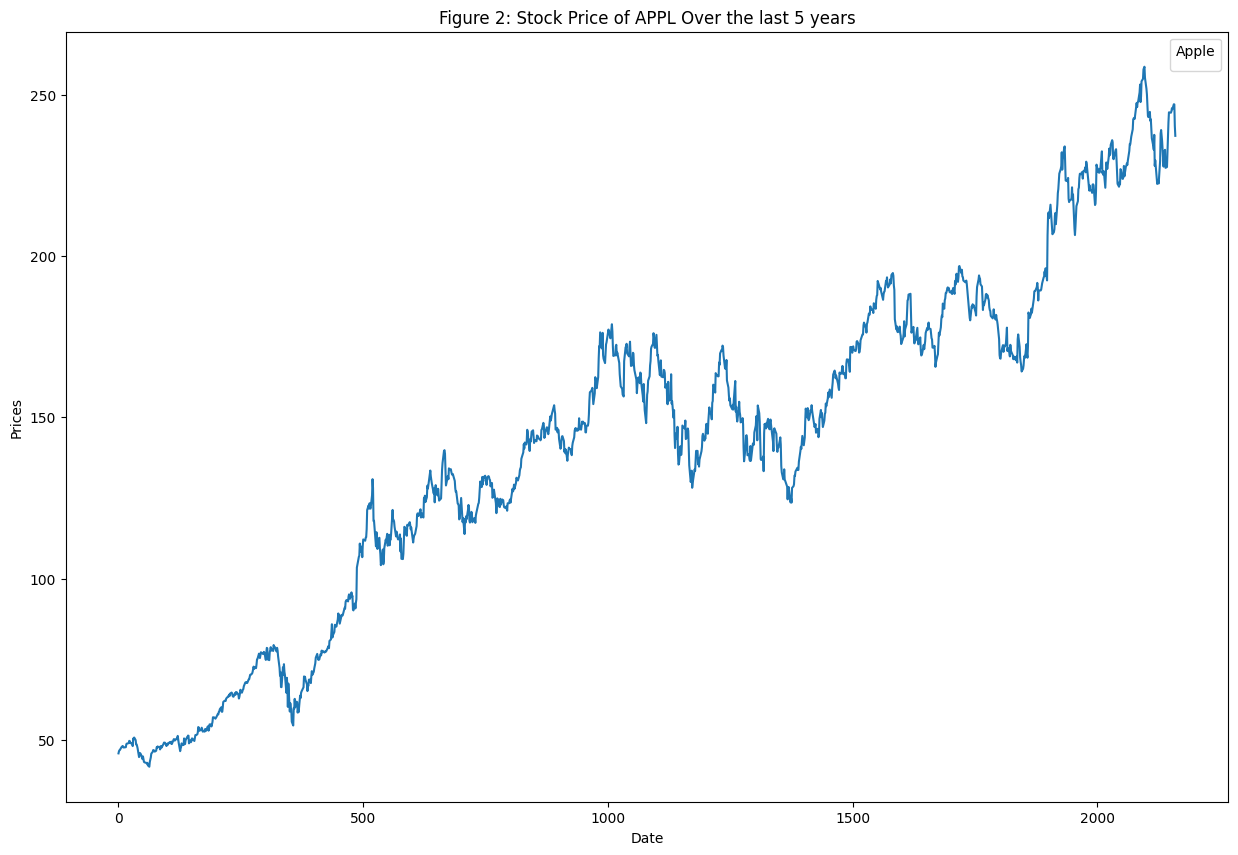

In [10]:
# overall price trend of APPL stock over the past 5 years
plt.figure(figsize = (15, 10))
sns.lineplot(data = data['AAPL'])
plt.title("Figure 2: Stock Price of APPL Over the last 5 years")
plt.xlabel("Date")
plt.ylabel("Prices")
plt.legend(title = "Apple")
plt.show()

<ipython-input-11-77dd06743337>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = "TESLA")


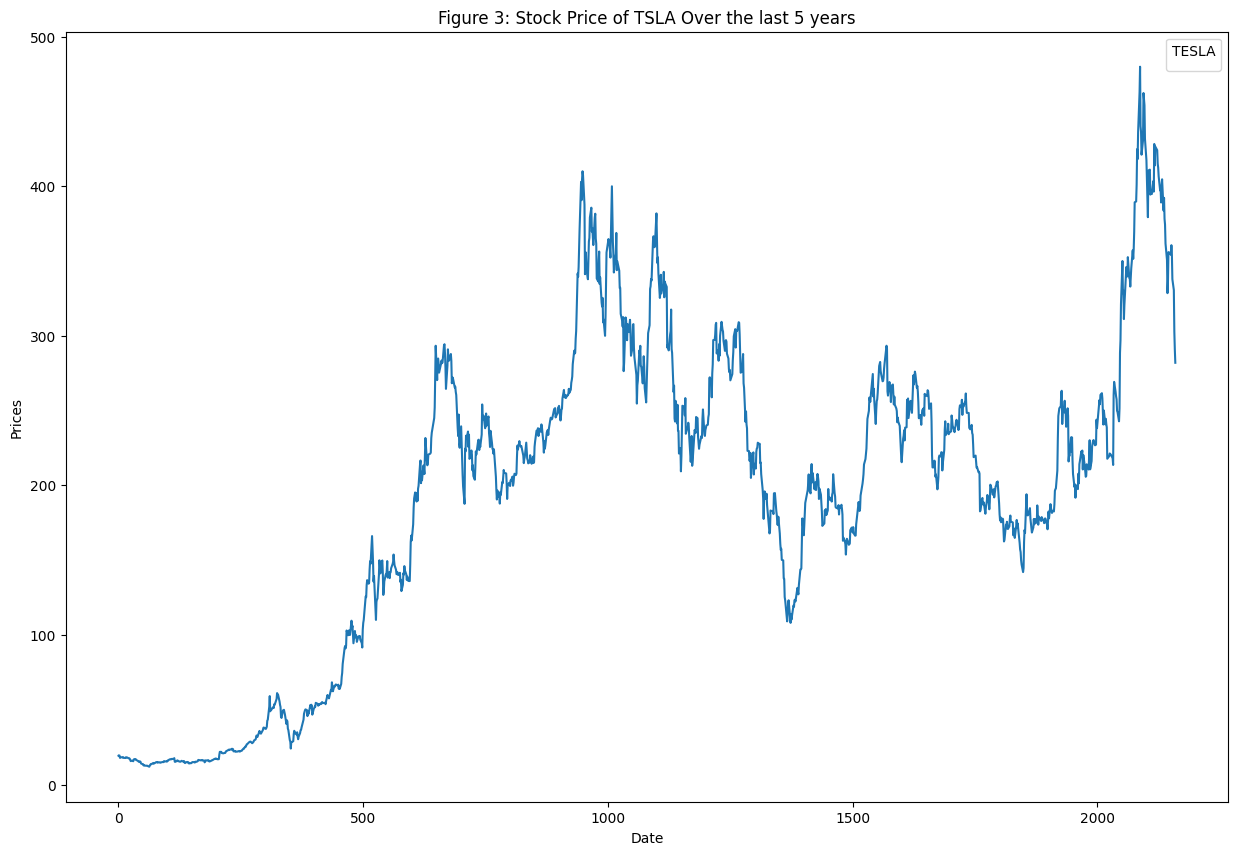

In [11]:
# overall price trend of TSLA stock over the past 5 years
plt.figure(figsize = (15, 10))
sns.lineplot(data = data['TSLA'])
plt.title("Figure 3: Stock Price of TSLA Over the last 5 years")
plt.xlabel("Date")
plt.ylabel("Prices")
plt.legend(title = "TESLA")
plt.show()

<ipython-input-12-23ceaf6e8826>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = "Google")


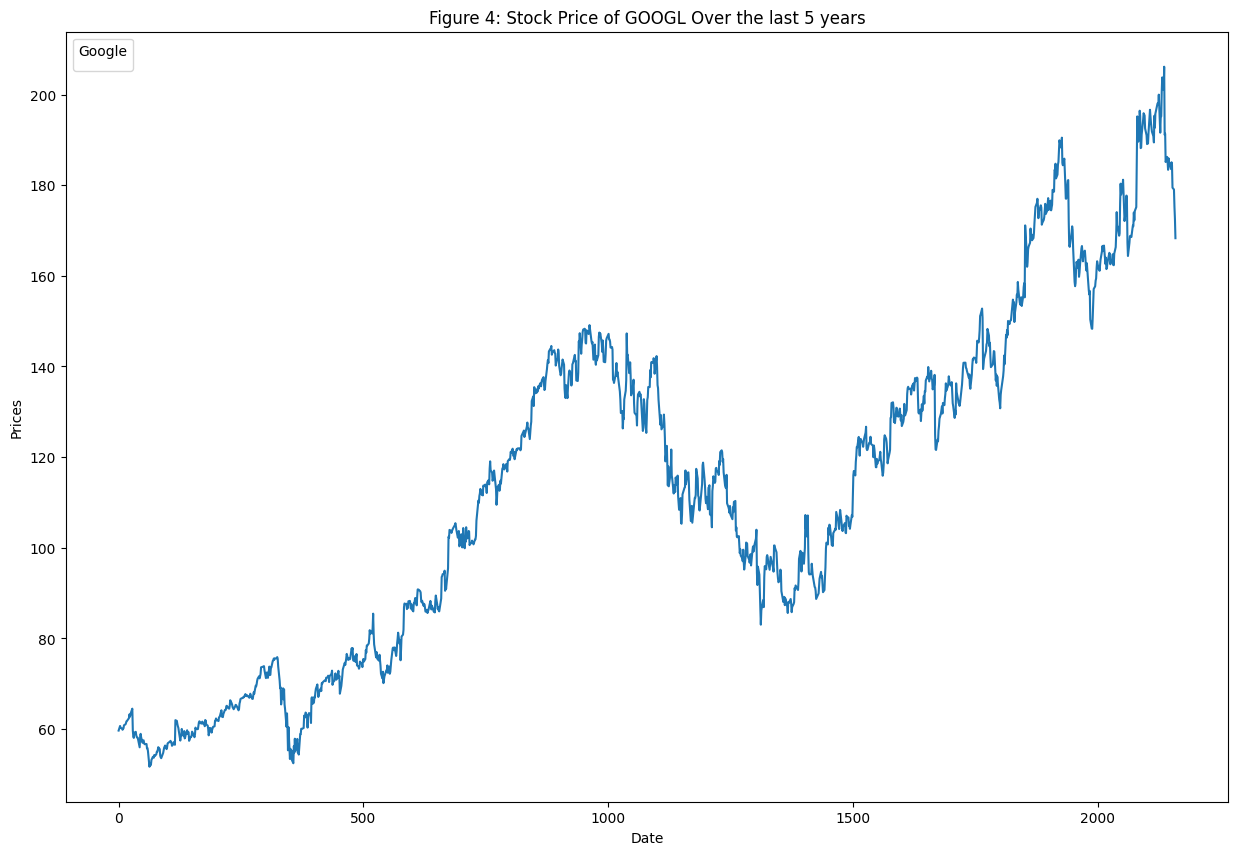

In [12]:
# overall price trend of GOOGL stock over the past 5 years
plt.figure(figsize = (15, 10))
sns.lineplot(data = data['GOOGL'])
plt.title("Figure 4: Stock Price of GOOGL Over the last 5 years")
plt.xlabel("Date")
plt.ylabel("Prices")
plt.legend(title = "Google")
plt.show()

<ipython-input-13-03df70cf82ef>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = "Facebook")


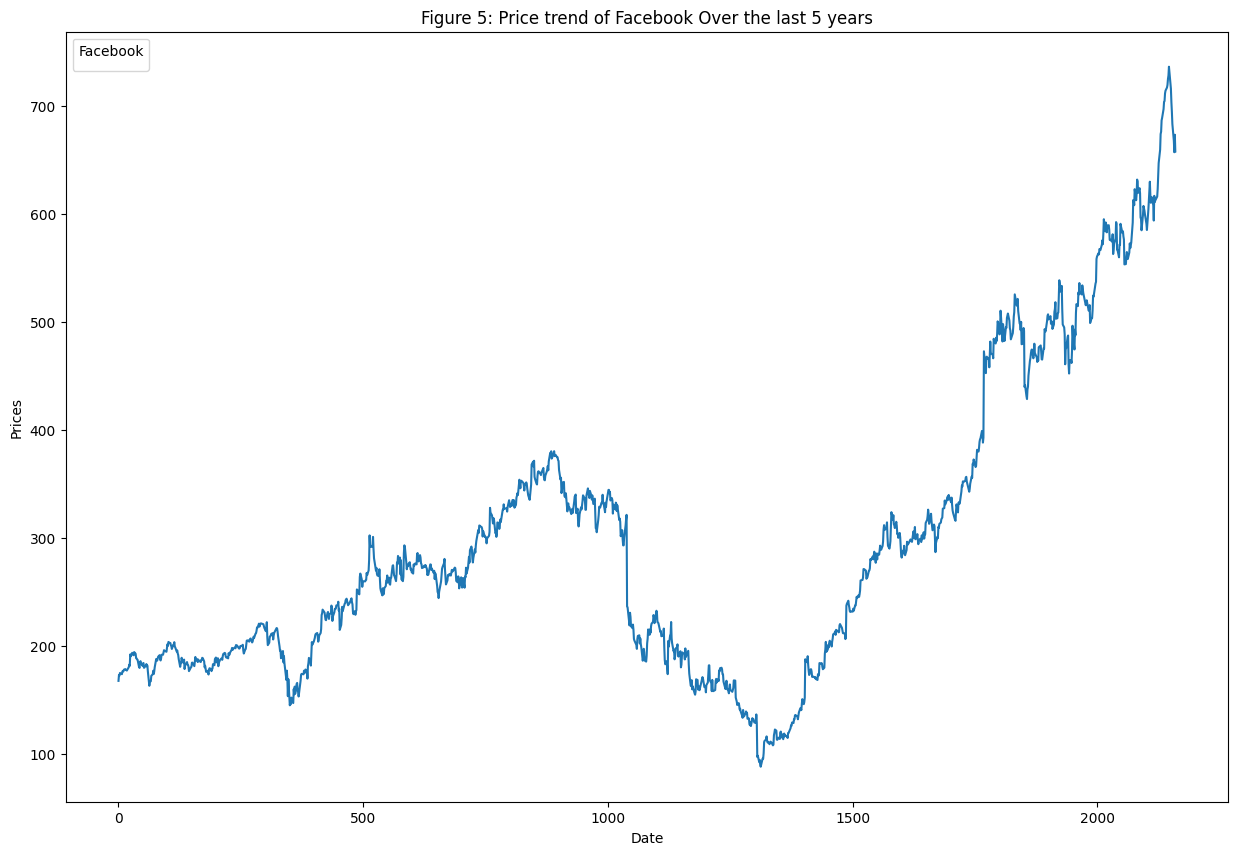

In [13]:
# overall price trend of META stock over the past 5 years
plt.figure(figsize = (15, 10))
sns.lineplot(data = data['META'])
plt.title("Figure 5: Price trend of Facebook Over the last 5 years")
plt.xlabel("Date")
plt.ylabel("Prices")
plt.legend(title = "Facebook")
plt.show()

In [14]:
# Take pivot of the data
log_prices = data_melt.pivot(index = "Date", columns = "Company", values = "Close")

In [15]:
log_prices = np.log(log_prices) - np.log(log_prices.shift(1))
log_prices = log_prices.iloc[1:, 0:]

In [16]:
log_prices.head()

Company,AAPL,BTC-USD,GOOGL,META,TSLA
Date,,,,,
2019-04-02,0.014432,0.160042,0.005456,0.032082,-0.011477
2019-04-03,0.006832,0.018907,0.004362,-0.003796,0.020531
2019-04-04,0.001739,-0.010150,0.007110,0.014190,-0.085937
2019-04-05,0.006672,0.022870,-0.006582,-0.001706,0.026460
2019-04-08,0.015614,0.049028,-0.002620,-0.004506,-0.006422


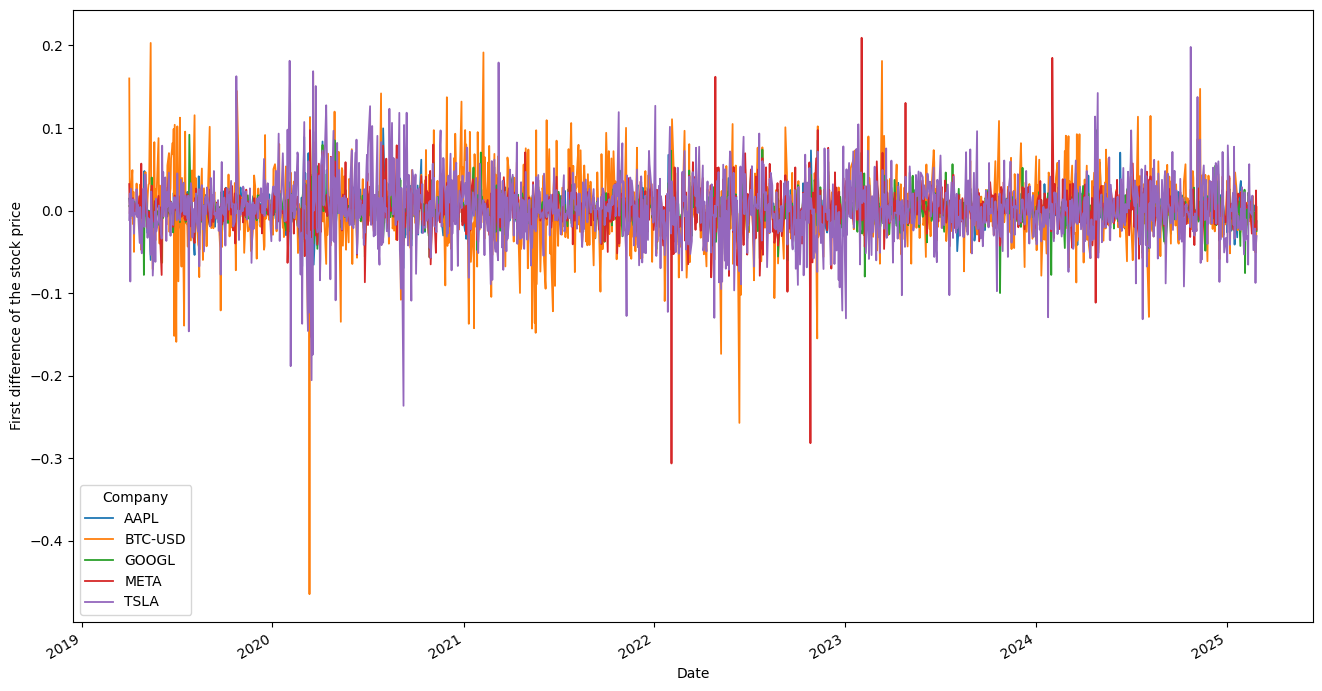

In [17]:
plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width

# Plot First Difference of AAPL Stock Price
log_prices.plot(
    linewidth=1.3, xlabel="Date", ylabel="First difference of the stock price"
)
plt.show()

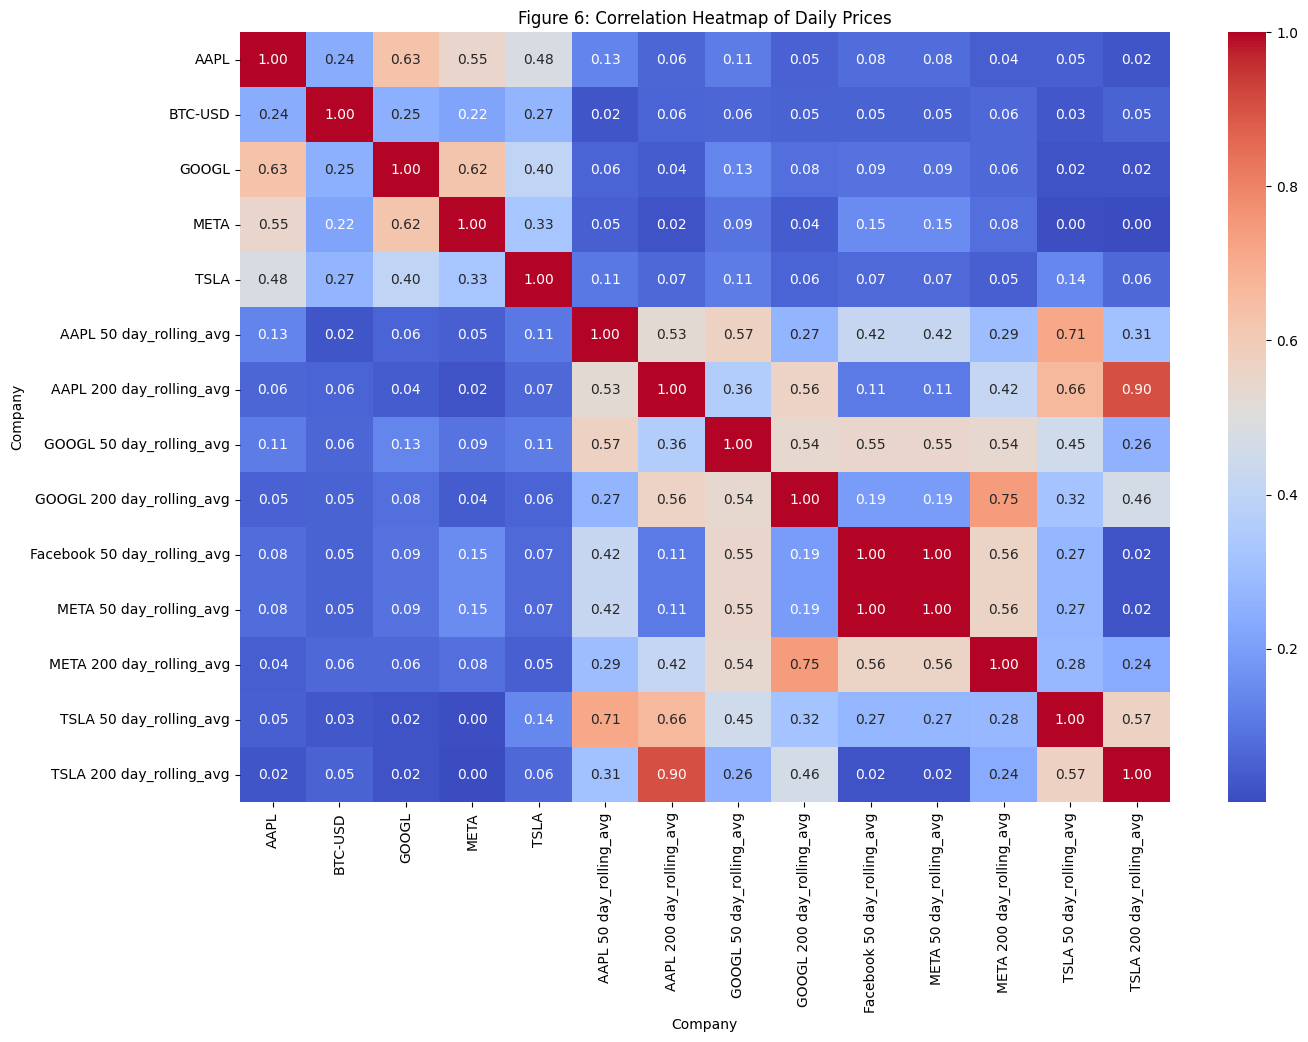

In [29]:
# Heatmap of the data
plt.figure(figsize=(15, 10))
sns.heatmap(log_prices.corr(), annot=True, cmap="coolwarm", fmt = ".2f")
plt.title("Figure 6: Correlation Heatmap of Daily Prices")
plt.show()

In [18]:
# Highest and Lowest Volatility Periods of the stocks

print("The period of highest and lowest volatility for AAPL:", log_prices['AAPL'].max(), log_prices['AAPL'].min())
print("The period of highest and lowest volatility for BTC-USD:", log_prices['BTC-USD'].max(), log_prices['BTC-USD'].min())
print("The period of highest and lowest volatility for Google:", log_prices['GOOGL'].max(), log_prices['GOOGL'].min())
print("The period of highest and lowest volatility for Facebook:", log_prices['META'].max(), log_prices['META'].min())
print("The period of highest and lowest volatility for TESLA:", log_prices['TSLA'].max(), log_prices['TSLA'].min())

The period of highest and lowest volatility for AAPL: 0.11315751286310505 -0.1377079081435415
The period of highest and lowest volatility for BTC-USD: 0.20304639975180194 -0.4647301753397741
The period of highest and lowest volatility for Google: 0.0973477779258749 -0.12368463585444012
The period of highest and lowest volatility for Facebook: 0.2093074471806453 -0.30639073363658564
The period of highest and lowest volatility for TESLA: 0.19818699146920782 -0.23651789445767601


COMPARING 50 DAY AND 200 DAY MOVING AVERAGE OF THE STOCK

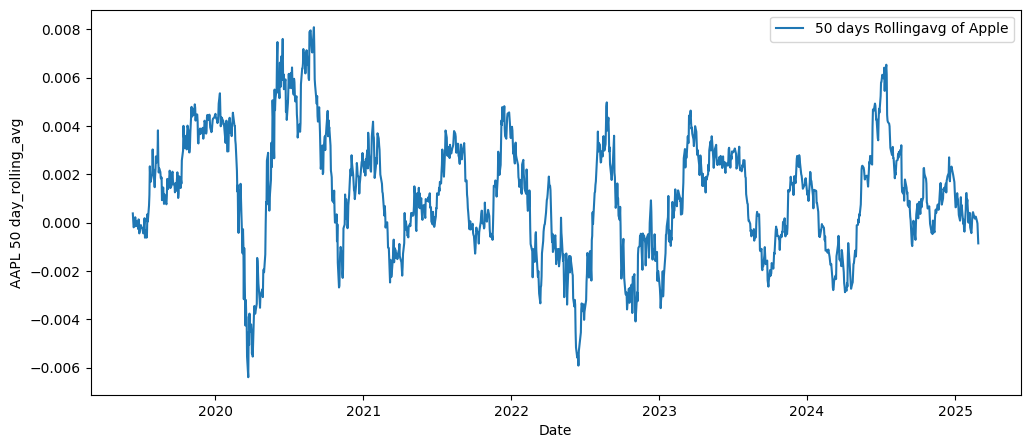

In [19]:
log_prices["AAPL 50 day_rolling_avg"] = log_prices.AAPL.rolling(50).mean()

# set figure size
plt.figure(figsize=(12, 5))

# plot rolling average
sns.lineplot(x="Date", y="AAPL 50 day_rolling_avg", data=log_prices, label="50 days Rollingavg of Apple");

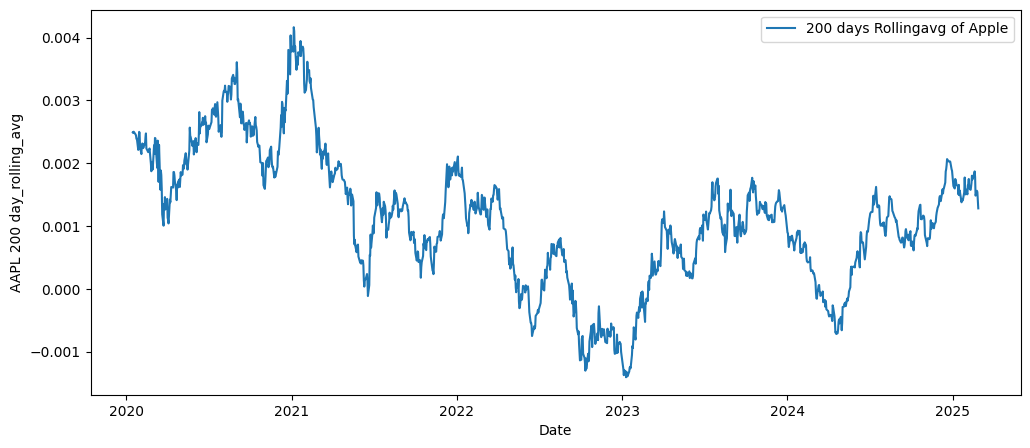

In [20]:
log_prices["AAPL 200 day_rolling_avg"] = log_prices.AAPL.rolling(200).mean()

# set figure size
plt.figure(figsize=(12, 5))

# plot rolling average
sns.lineplot(x="Date", y="AAPL 200 day_rolling_avg", data=log_prices, label="200 days Rollingavg of Apple");

Observe that the 50 day moving indicates price fall in the 1st quarters of 2020 and spike in price towards the end of 2020.

while, 200 day MA shows its minimum price around 2023 and its maximum price in early 2021.

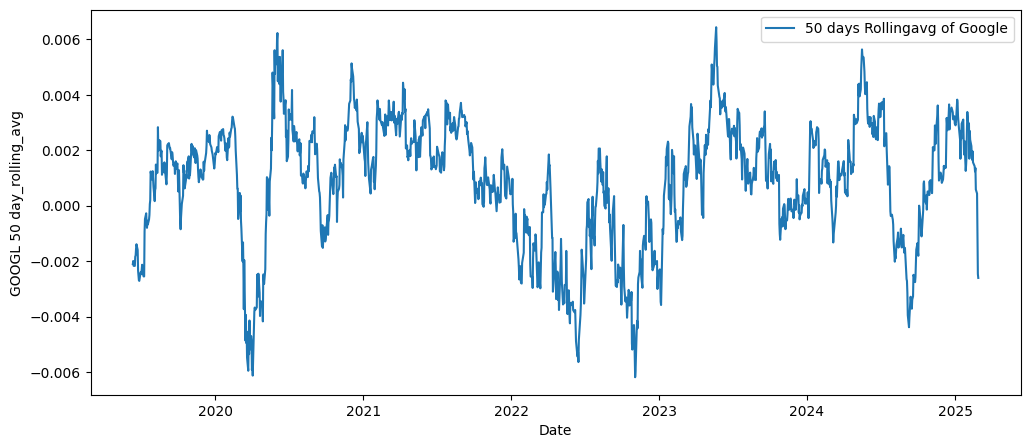

In [22]:
log_prices["GOOGL 50 day_rolling_avg"] = log_prices.GOOGL.rolling(50).mean()

# set figure size
plt.figure(figsize=(12, 5))

# plot rolling average
sns.lineplot(x="Date", y="GOOGL 50 day_rolling_avg", data=log_prices, label="50 days Rollingavg of Google");

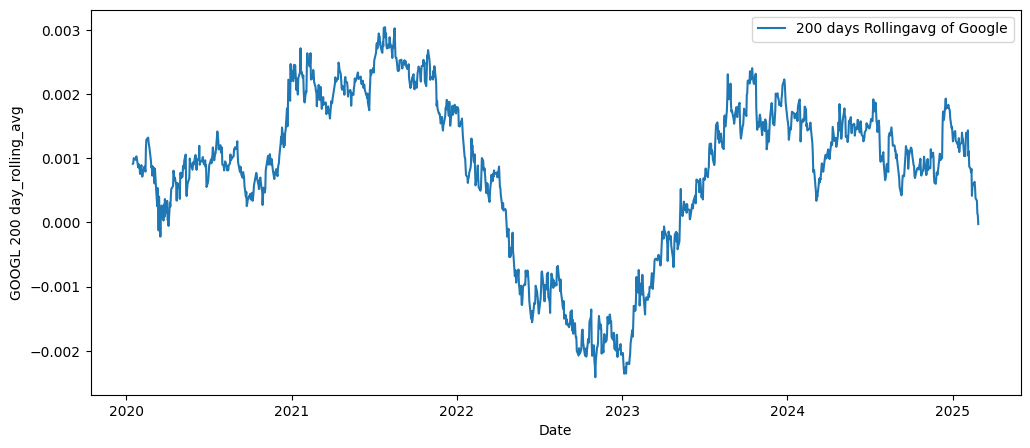

In [23]:
log_prices["GOOGL 200 day_rolling_avg"] = log_prices.GOOGL.rolling(200).mean()

# set figure size
plt.figure(figsize=(12, 5))

# plot rolling average
sns.lineplot(x="Date", y="GOOGL 200 day_rolling_avg", data=log_prices, label="200 days Rollingavg of Google");

There is a fall in stock price of GOOGL around 2020. This noticed in most stock prices as caused by the covid-19 pandermic. However, 200 days MA of GOOGL stock seem to be not affected as its minimum price appears around 2023.

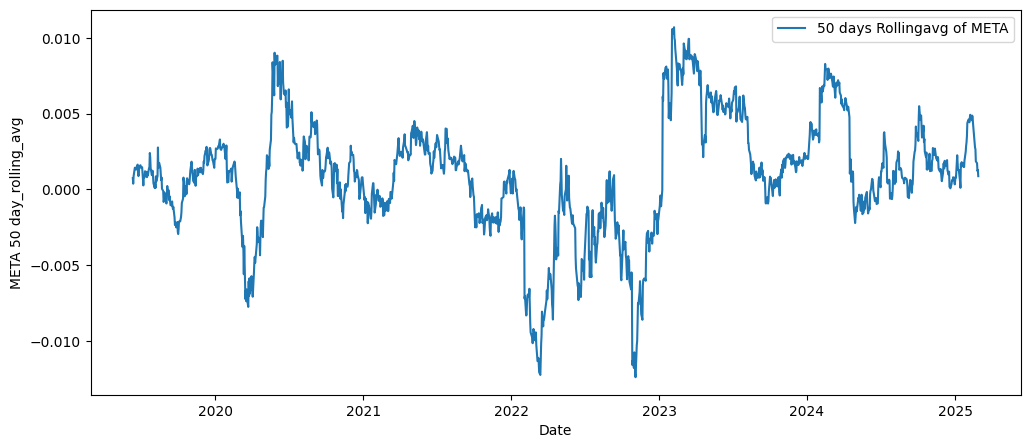

In [25]:
log_prices["META 50 day_rolling_avg"] = log_prices.META.rolling(50).mean()

# set figure size
plt.figure(figsize=(12, 5))

# plot rolling average
sns.lineplot(x="Date", y="META 50 day_rolling_avg", data=log_prices, label="50 days Rollingavg of META");

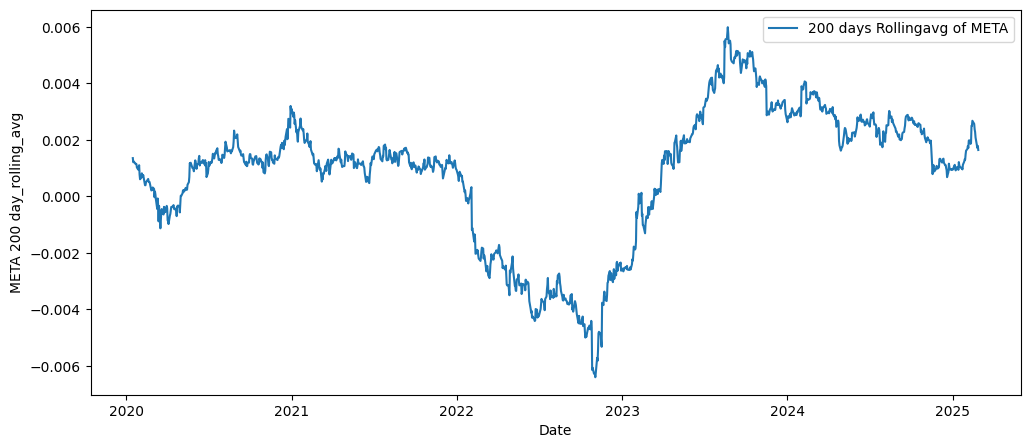

In [26]:
log_prices["META 200 day_rolling_avg"] = log_prices.META.rolling(200).mean()

# set figure size
plt.figure(figsize=(12, 5))

# plot rolling average
sns.lineplot(x="Date", y="META 200 day_rolling_avg", data=log_prices, label="200 days Rollingavg of META");

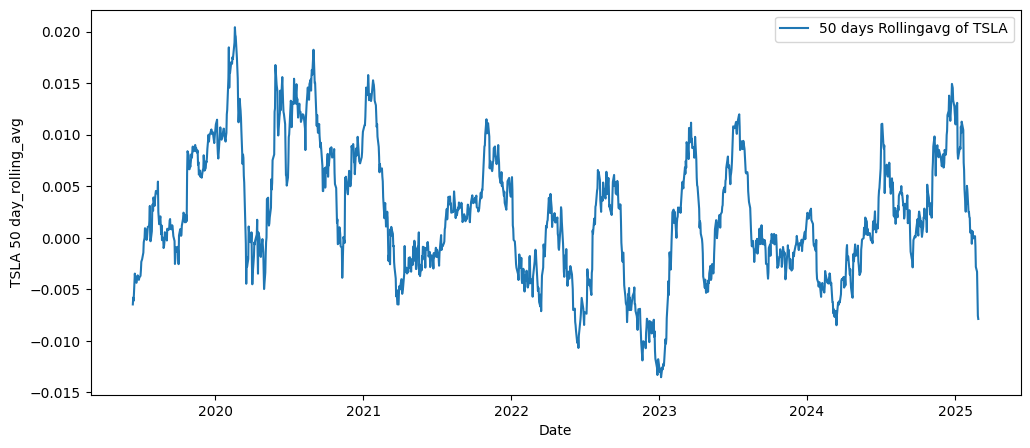

In [27]:
log_prices["TSLA 50 day_rolling_avg"] = log_prices.TSLA.rolling(50).mean()

# set figure size
plt.figure(figsize=(12, 5))

# plot rolling average
sns.lineplot(x="Date", y="TSLA 50 day_rolling_avg", data=log_prices, label="50 days Rollingavg of TSLA");

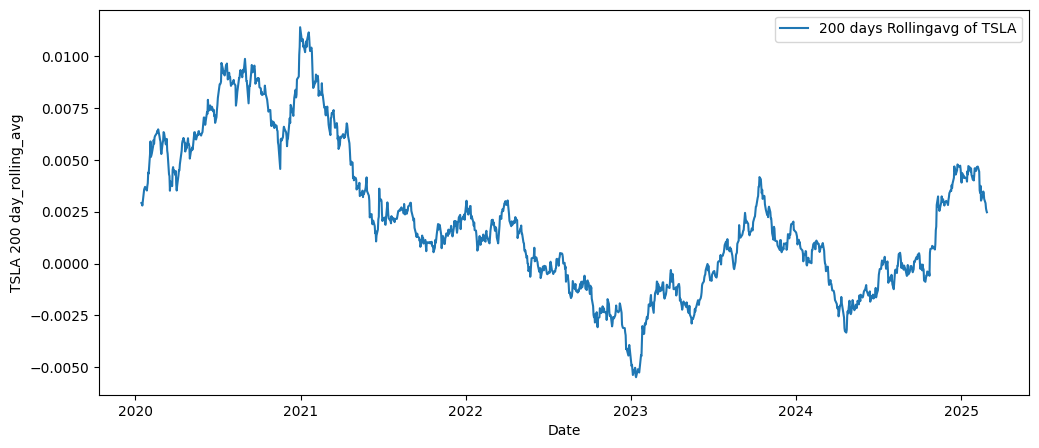

In [28]:
log_prices["TSLA 200 day_rolling_avg"] = log_prices.TSLA.rolling(200).mean()

# set figure size
plt.figure(figsize=(12, 5))

# plot rolling average
sns.lineplot(x="Date", y="TSLA 200 day_rolling_avg", data=log_prices, label="200 days Rollingavg of TSLA");

50 day MA of Tesla showed a current downtrend of the stock. 200 day MA also show downtrend in 2025 but not as steep as in 50 day RollingAVe

Conclusively, we observed that stock trends can be oberved and analysed using moving average indicator. The stock can exhibit different trends as though it is of another stock. It is critical for traders as well as stock analyst to know the kind of indicators to use when initiating a trade. Moving average is one of the easiest and efficient indicator to use.
